In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench import (MultiprocessingEvaluator,
                           Scenario, Constraint, Policy,
                           ScalarOutcome)
from ema_workbench.em_framework.optimization import EpsilonProgress, HyperVolume
from ema_workbench.em_framework.evaluators import perform_experiments, optimize
from ema_workbench.util import ema_logging, save_results, load_results
from ema_workbench.analysis import (pairs_plotting, prim, 
                                    feature_scoring, parcoords,
                                    dimensional_stacking)

from problem_formulation import get_model_for_problem_formulation
%matplotlib inline
sns.set_style('white')

ema_logging.log_to_stderr(ema_logging.INFO)

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


<Logger EMA (DEBUG)>

In [2]:
'''
For different list of outcomes:
# 0 = 2-objective PF
# 1 = 3-objective PF
# 2 = 5-objective PF
# 3 = Disaggregate over locations
# 4 = Disaggregate over time
# 5 = Fully disaggregated
'''
dike_model, planning_steps = get_model_for_problem_formulation(4) # assign problem_formulation_id

In [3]:
# with no policies
ref_policy = {'DikeIncrease': 0, 'DaysToThreat': 0, 'RfR': 0}

policy0 = {}
for key in dike_model.levers:
    _, s = key.name.split('_')
    if ' ' in s:
        s, _ = s.split(' ')
    policy0.update({key.name: ref_policy[s]})                

policy0 = Policy('Policy 0', **policy0)

In [7]:
n_scenarios = 10000

In [8]:
%%time
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios= n_scenarios,
                                            policies = policy0,
                                            uncertainty_sampling='lhs')

save_results(results, './results/policy0_lhs_10000runs.tar.gz')

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 10000 scenarios * 1 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to D:\EPA\EPA Semester-1.4\EPA1361 Model-based Decision-making\MBDM-group-11\final assignment\results\policy0_lhs_10000runs.tar.gz


Wall time: 1h 24min 24s


## Visualise outcomes

In [4]:
results = load_results(r'./results/policy0_lhs_10000runs.tar.gz')

experiments, outcomes = results

[MainProcess/INFO] results loaded succesfully from D:\EPA\EPA Semester-1.4\EPA1361 Model-based Decision-making\MBDM-group-11\final assignment\results\policy0_lhs_10000runs.tar.gz


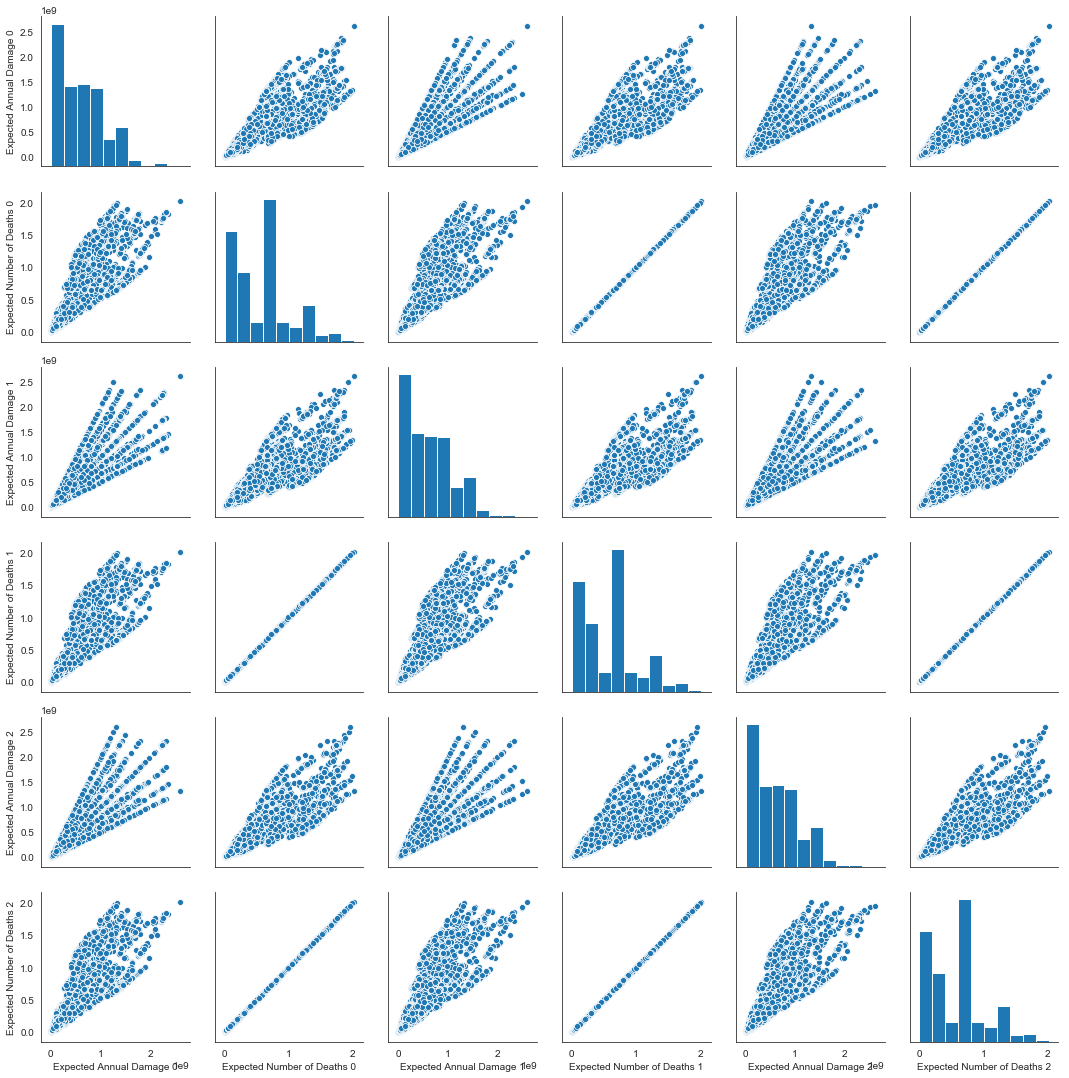

In [24]:
outcomes_dropCosts = pd.DataFrame.from_dict(outcomes).filter(regex='(^Expected Annual Damage|^Expected Number of Deaths)')

sns.pairplot(outcomes_dropCosts)

## Visualise outcomes over time

In [5]:
# take a look at the experiments
experiments.filter(regex=r'(wave shape$|Bmax$|pfail$|Brate$|^discount)').sample(10)

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
4657,85.0,214.462370,1.5,0.498139,52.770299,10.0,0.095209,93.713158,1.5,0.331538,248.024124,1.0,0.011308,150.098437,1.0,0.567401,2.5,4.5,1.5
9266,119.0,309.975226,1.0,0.614609,179.373513,1.0,0.332733,218.990594,1.0,0.704599,133.498594,10.0,0.460450,223.379402,10.0,0.601501,2.5,3.5,2.5
6821,56.0,339.623456,1.5,0.050433,214.405852,10.0,0.855604,349.166679,1.5,0.963955,291.443156,10.0,0.817224,236.398604,1.0,0.285165,3.5,4.5,1.5
484,34.0,326.940363,1.0,0.650901,48.118686,1.5,0.250506,349.795384,10.0,0.254618,124.223161,1.0,0.838713,255.215581,1.0,0.214129,2.5,3.5,1.5
9044,129.0,307.547704,10.0,0.259311,256.492805,1.5,0.879504,300.259878,1.5,0.779781,46.625243,10.0,0.632320,227.625712,1.0,0.343123,1.5,1.5,3.5
7345,7.0,177.776238,1.5,0.477689,228.031381,10.0,0.457743,32.212171,1.0,0.003470,163.191060,1.5,0.688134,47.708758,1.5,0.590120,4.5,1.5,4.5
2043,113.0,128.835904,10.0,0.209673,226.951213,1.0,0.128336,204.744245,1.5,0.300976,225.515249,1.0,0.817174,89.445528,10.0,0.407882,2.5,4.5,3.5
7763,80.0,234.171991,1.0,0.410091,348.673002,1.5,0.574731,141.283892,1.5,0.992187,117.937428,10.0,0.369186,271.238605,1.0,0.573370,3.5,3.5,1.5
5853,102.0,281.618224,10.0,0.681319,210.224358,1.5,0.889351,200.679043,1.0,0.000787,185.394582,1.0,0.247849,230.333254,1.0,0.916337,3.5,3.5,1.5
5123,62.0,119.302765,1.5,0.426142,57.077383,10.0,0.485559,40.099963,1.0,0.460600,157.368797,1.0,0.118246,146.539985,1.0,0.836599,4.5,1.5,2.5


In [6]:
# take a look at the outcomes
pd.DataFrame.from_dict(outcomes).sample(10)

,Expected Annual Damage 0,Dike Investment Costs 0,Expected Number of Deaths 0,RfR Total Costs 0,Expected Evacuation Costs 0,Expected Annual Damage 1,Dike Investment Costs 1,Expected Number of Deaths 1,RfR Total Costs 1,Expected Evacuation Costs 1,Expected Annual Damage 2,Dike Investment Costs 2,Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
4433,6.998794e+08,0,0.718477,0.0,0.0,8.536573e+08,0,0.718477,0.0,0.0,1.071542e+09,0,0.718477,0.0,0.0
2770,8.333721e+08,0,0.680073,0.0,0.0,8.333721e+08,0,0.680073,0.0,0.0,1.356760e+09,0,0.680073,0.0,0.0
6994,7.150901e+08,0,0.705927,0.0,0.0,1.094830e+09,0,0.705927,0.0,0.0,1.094830e+09,0,0.705927,0.0,0.0
4021,5.248992e+07,0,0.055541,0.0,0.0,6.402303e+07,0,0.055541,0.0,0.0,8.036407e+07,0,0.055541,0.0,0.0
2493,8.300638e+08,0,0.665650,0.0,0.0,1.041927e+09,0,0.665650,0.0,0.0,1.041927e+09,0,0.665650,0.0,0.0
3429,1.187367e+09,0,0.902210,0.0,0.0,7.755304e+08,0,0.902210,0.0,0.0,9.459303e+08,0,0.902210,0.0,0.0
4245,8.683513e+07,0,0.080713,0.0,0.0,5.671650e+07,0,0.080713,0.0,0.0,6.917828e+07,0,0.080713,0.0,0.0
1201,1.173945e+09,0,1.089990,0.0,0.0,1.473579e+09,0,1.089990,0.0,0.0,1.473579e+09,0,1.089990,0.0,0.0
3230,1.586498e+08,0,0.170897,0.0,0.0,2.582877e+08,0,0.170897,0.0,0.0,1.991431e+08,0,0.170897,0.0,0.0
2058,1.772581e+09,0,1.839802,0.0,0.0,1.412149e+09,0,1.839802,0.0,0.0,2.299030e+09,0,1.839802,0.0,0.0


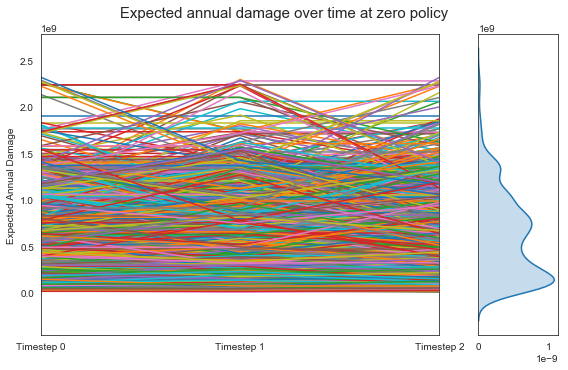

In [36]:
## visualize expected annual damage over time

SAMPLE_SIZE = 2000 # sample out of 10,000 runs

# subset outcomes of expected annual damage
df_damage = pd.DataFrame.from_dict(outcomes).filter(regex='^Expected Annual Damage').sample(SAMPLE_SIZE)
df_damage.columns = ['Timestep 0', 'Timestep 1', 'Timestep 2']

from matplotlib import gridspec

fig = plt.figure(figsize=(8, 5))
gs = gridspec.GridSpec(1,2, width_ratios=[5, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax1)
ax1.set_ylabel('Expected Annual Damage')

df.T.plot(legend=False, ax=ax1)
sns.distplot(df_damage['Timestep 2'], hist=False, vertical=True, 
             ax=ax2, kde_kws={'shade': True})

fig.suptitle('Expected annual damage over time at zero policy', y=1.02, fontsize=15)
gs.tight_layout(fig, rect=[0, 0, 1, 1])

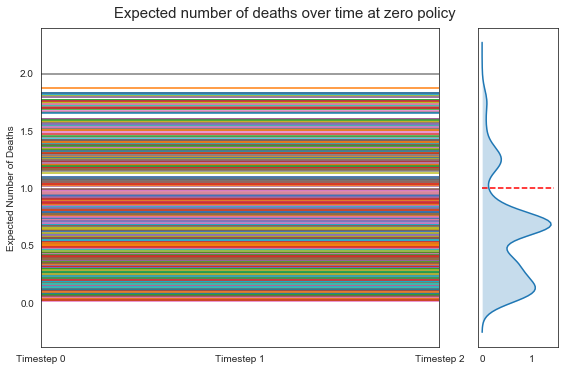

In [37]:
## visualize expected number of deaths over time

NR_DEATH_THRESHOLD = 1

# subset outcomes of expected annual damage
df_death = pd.DataFrame.from_dict(outcomes).loc[df_damage.index, :].filter(regex='^Expected Number of Deaths')
df_death.columns = ['Timestep 0', 'Timestep 1', 'Timestep 2']

from matplotlib import gridspec

fig = plt.figure(figsize=(8, 5))
gs = gridspec.GridSpec(1,2, width_ratios=[5, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax1)
ax1.set_ylabel('Expected Number of Deaths')

df.T.plot(legend=False, ax=ax1)
sns.distplot(df_death['Timestep 2'], kde=True, hist=False, vertical=True, 
             ax=ax2, kde_kws={'shade': True})
ax2.hlines(NR_DEATH_THRESHOLD, ax2.get_xlim()[0], ax2.get_xlim()[1],
           linestyle = '--', colors='r')

fig.suptitle('Expected number of deaths over time at zero policy', y=1.02, fontsize=15)
gs.tight_layout(fig, rect=[0, 0, 1, 1])

### Accumulated results over time

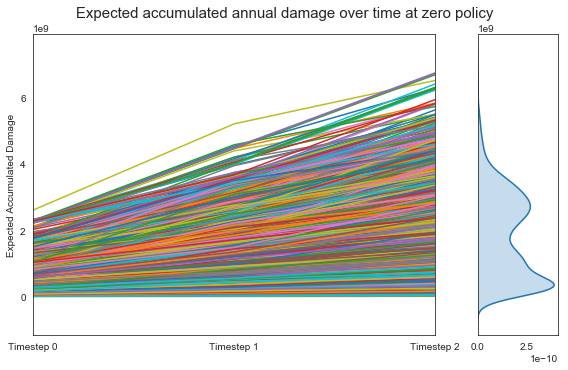

In [10]:
## visualize (accumulated) expected annual damage over time

SAMPLE_SIZE = 5000 # sample out of 10,000 runs

# subset outcomes of expected annual damage
df_damage = pd.DataFrame.from_dict(outcomes).filter(regex='^Expected Annual Damage').sample(SAMPLE_SIZE)
df_damage = df_damage.cumsum(axis=1) # accumulate damage over time
df_damage.columns = ['Timestep 0', 'Timestep 1', 'Timestep 2']

from matplotlib import gridspec

fig = plt.figure(figsize=(8, 5))
gs = gridspec.GridSpec(1,2, width_ratios=[5, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax1)
ax1.set_ylabel('Expected Accumulated Damage')

df_damage.T.plot(legend=False, ax=ax1)
sns.distplot(df_damage['Timestep 2'], hist=False, vertical=True, 
             ax=ax2, kde_kws={'shade': True})

fig.suptitle('Expected accumulated annual damage over time at zero policy', y=1.02, fontsize=15)
gs.tight_layout(fig, rect=[0, 0, 1, 1])

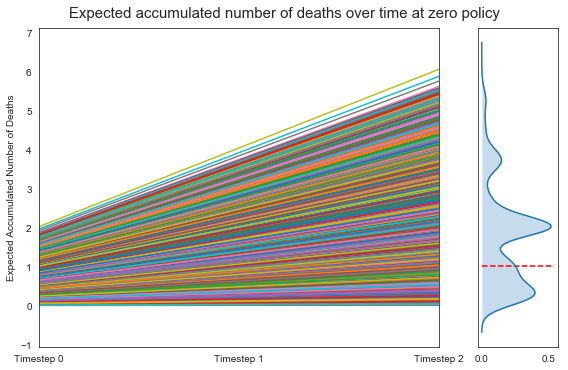

In [11]:
## visualize expected number of deaths over time

NR_DEATH_THRESHOLD = 1

# subset outcomes of expected annual damage
df_death = pd.DataFrame.from_dict(outcomes).loc[df_damage.index, :].filter(regex='^Expected Number of Deaths')
df_death = df_death.cumsum(axis=1) # accumulate deaths over time
df_death.columns = ['Timestep 0', 'Timestep 1', 'Timestep 2']

from matplotlib import gridspec

fig = plt.figure(figsize=(8, 5))
gs = gridspec.GridSpec(1,2, width_ratios=[5, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax1)
ax1.set_ylabel('Expected Accumulated Number of Deaths')

df_death.T.plot(legend=False, ax=ax1)
sns.distplot(df_death['Timestep 2'], kde=True, hist=False, vertical=True, 
             ax=ax2, kde_kws={'shade': True})
ax2.hlines(NR_DEATH_THRESHOLD, ax2.get_xlim()[0], ax2.get_xlim()[1],
           linestyle = '--', colors='r')

fig.suptitle('Expected accumulated number of deaths over time at zero policy', y=1.02, fontsize=15)
gs.tight_layout(fig, rect=[0, 0, 1, 1])

Text(0.5, 0.95, 'Expected accumulated outcomes at zero policy')

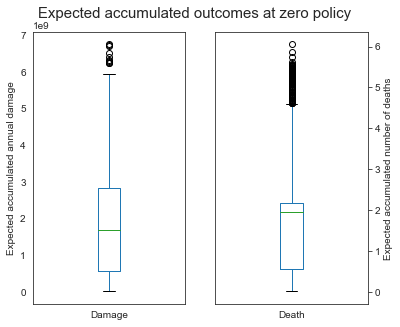

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(6, 5))
pd.Series(df_damage['Timestep 2']).plot(kind='box', ax=axes[0], label='Damage')
pd.Series(df_death['Timestep 2']).plot(kind='box', ax=axes[1], label='Death')
axes[0].set_ylabel('Expected accumulated annual damage')
axes[1].set_ylabel('Expected accumulated number of deaths')
axes[1].yaxis.tick_right()
axes[1].yaxis.set_label_position("right")
fig.suptitle('Expected accumulated outcomes at zero policy', y=0.95, fontsize=15)

In [38]:
from scipy.stats import pearsonr

print('Correlation bewteen damage and deaths:\n{}\n'.format(np.corrcoef(df_damage['Timestep 2'],
                                                                        df_death['Timestep 2'])))

print('Pearson correlation coeff and the p-value:\n{}'.format(pearsonr(df_damage['Timestep 2'],
                                                                       df_death['Timestep 2'])))

Correlation bewteen damage and deaths:
[[1.         0.80367975]
 [0.80367975 1.        ]]

Pearson correlation coeff and the p-value:
(0.803679746259304, 0.0)


There is a statistically significant correlation between the number of deaths and the amount of damage. We can thus simplify the scneario discovery by using either the number of deaths or the amount of flood damage in the classify function.

## PRIM

Identify relatively large regions in the uncertainty space that generate relatively high concentrations of undesirable results, and the combinations of uncertainties and their values that lead to these regions.

Here we use damage,and classify a scenario as being of interest if **damage < its 10th percentile**.

In [45]:
acc_damage = outcomes['Expected Annual Damage 0'] + outcomes['Expected Annual Damage 1'] + outcomes['Expected Annual Damage 2']

DAMAGE_THRESHOLD = np.percentile(acc_damage, 10)

print('The 10th percentile for accumulated damage at end state is %0.2f *1e8.' % (DAMAGE_THRESHOLD / 1e8))

The 10th percentile for accumulated damage at end state is 2.39 *1e8.


In [48]:
x = experiments.filter(regex=r'(wave shape$|Bmax$|pfail$|Brate$|^discount)') # uncertainties
y = acc_damage < DAMAGE_THRESHOLD

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 10000 points remaining, containing 1000 cases of interest
[MainProcess/INFO] mean: 0.950199203187251, mass: 0.0502, coverage: 0.477, density: 0.950199203187251 restricted_dimensions: 5


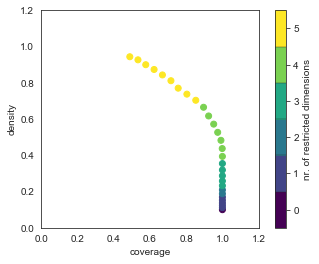

In [51]:
box1.show_tradeoff()
plt.show()

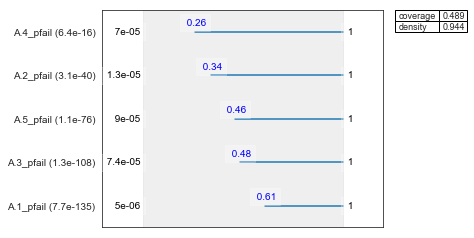

In [52]:
box1.inspect(style='graph')
plt.show()

Text(0.5, 1.0, 'Subspace damage < 10th percentile at zero policy')

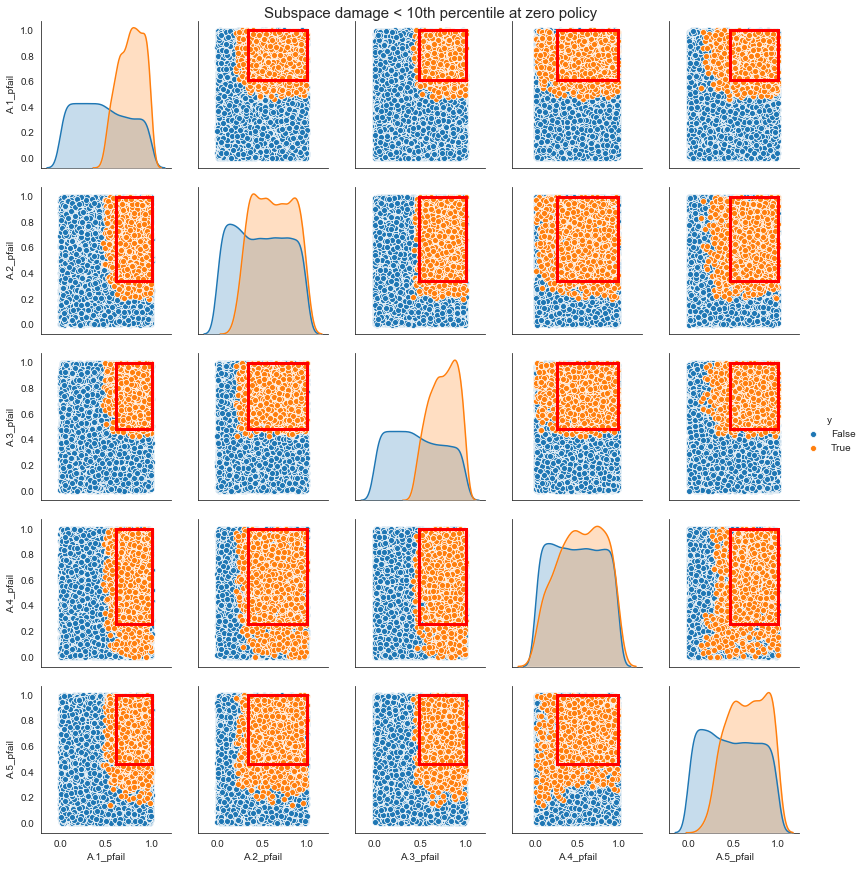

In [57]:
box1.show_pairs_scatter()
fig = plt.gcf()
fig.set_size_inches(12,12)
fig.suptitle('Subspace damage < 10th percentile at zero policy', y=1.0, fontsize=15)

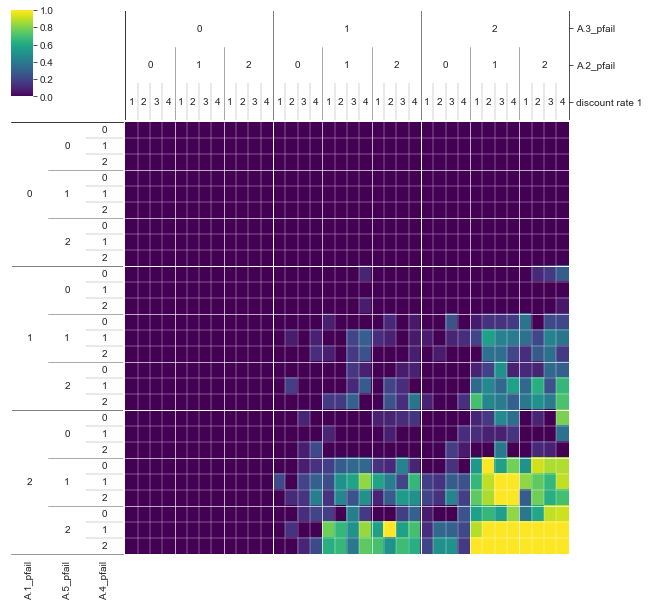

In [53]:
dimensional_stacking.create_pivot_plot(x, y)
plt.show()